# Project Title: Red Wine Quality Prediction
## Group Details: 
-  **Team Lead:** Henry Mbata, X00185535, X00185535@mytudublin.ie
-  **Member 2:** Jose Lo Mantilla, X00220311, X00220311@mytudublin.ie
-  **Member 3:** Richard Idowu, X00215256, X00215256@mytudublin.ie

## Project Summary / Proposal
-  **Objective:** Predict red wine quality (0-10) from physicochemical properties.
-  **Dataset:** Red Wine Quality Dataset (Cortez et al., 2009)
-  **Demo:** User enters a new wine sample (acidity, pH, alcohol, etc.) and AI predicts quality score (0-10) and category (Poor/Good/Excellent)

## Dataset Details
-  **Source:** UCI Machine Learning Repository / Kaggle mirror
-  **Rows:** 1599
-  **Columns:** 12 (11 features + 1 output)


# Importing Libraries 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Data Cleaning and Wrangling
   - Loading dataset
   - Skipping header row and removing all zero rows



In [2]:
data = np.genfromtxt("winequality-red.csv",delimiter=",")
data = data[1:,:]  # Skip header row
data = data[~np.all(data == 0, axis=1)]  # Remove all-zero rows
X = data[:, :-1]
y = data[:, -1]

print("Data shape:", data.shape)
print("Feature shape:", X.shape, "Target shape:", y.shape)

Data shape: (1599, 12)
Feature shape: (1599, 11) Target shape: (1599,)


# Feature Selection and Pre-Processing
- Select the 11 physiochemical features as inputs (x). 
- Seperate features and target - Use wine qaulity as the output. 
- Split dataset into train, validation and test sets.

In [3]:

#Separate features and target
X = data[:, :-1]  
y = data[:, -1]  

print("Data shape:", data.shape)
print("Feature shape:", X.shape, "Target shape:", y.shape)

#Split into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

#Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

#categorize target variable
y_val_names = np.array(['poor' if x <= 4 else 'good' if x <= 6 else 'excellent' for x in y_val])

#Print shapes
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

#print divisions in validation set
poor = np.sum(y_val <= 4)
good = np.sum((y_val > 4) & (y_val <= 6))
excellent = np.sum(y_val > 6)

print("VALIDATION class distribution:")
print(" poor =", poor)
print(" good =", good)
print(" excellent =", excellent)


Data shape: (1599, 12)
Feature shape: (1599, 11) Target shape: (1599,)
Train set: (959, 11) (959,)
Validation set: (320, 11) (320,)
Test set: (320, 11) (320,)
VALIDATION class distribution:
 poor = 12
 good = 265
 excellent = 43


##  Model and Model Comparison
### Logistic Regression
- Simple model to predict wine quality
- Good baseline

In [4]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_val_lr = log_reg.predict(X_val)
y_test_lr = log_reg.predict(X_test)
val_acc_lr = accuracy_score(y_val, y_val_lr)
test_acc_lr = accuracy_score(y_test, y_test_lr)

#categorize target variable for logistic regression predictions
y_val_lr_names = np.array(['poor' if x <= 4 else 'good' if x <= 6 else 'excellent' for x in y_val_lr])
print("Validation Accuracy:", val_acc_lr, "\nTest Accuracy:", test_acc_lr)  

Validation Accuracy: 0.571875 
Test Accuracy: 0.578125


### Random Forest Classifier
- Ensemble of decision trees
- Handles nonlinear relationships and feature interactions
- Usually better performance on structured categorical/numeric data

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_val_rf = rf.predict(X_val)
y_test_rf = rf.predict(X_test)
val_acc_rf = accuracy_score(y_val, y_val_rf)
test_acc_rf = accuracy_score(y_test, y_test_rf)


#categorize target variable for random forest predictions
y_val_rf_names = np.array(['poor' if x <= 4 else 'good' if x <= 6 else 'excellent' for x in y_val_rf])
print("Validation Accuracy:", val_acc_rf, "\nTest Accuracy:", test_acc_rf)  

Validation Accuracy: 0.66875 
Test Accuracy: 0.646875


# Model Comparison

### Approach
We trained both **Logistic Regression** and **Random Forest** on our training data and tested them on the validation and test sets. This lets us see which model predicts wine quality more accurately and consistently.  

### Observations
Logistic Regression serves as a simple baseline model. It achieved a validation accuracy of 0.571875 and a test accuracy of 0.578125, showing it predicts just over half of the wines correctly.

Random Forest handles the non-linear relationships and interactions between wine features better. It achieved a validation accuracy of 0.66875 and a test accuracy of 0.646875, outperforming Logistic Regression on both sets.

### Outcome
From looking at the results, Random Forest clearly performs better than Logistic Regression so we will use it for our final demo to predict wine quality.

Validation Accuracy: 0.571875 
Test Accuracy: 0.578125


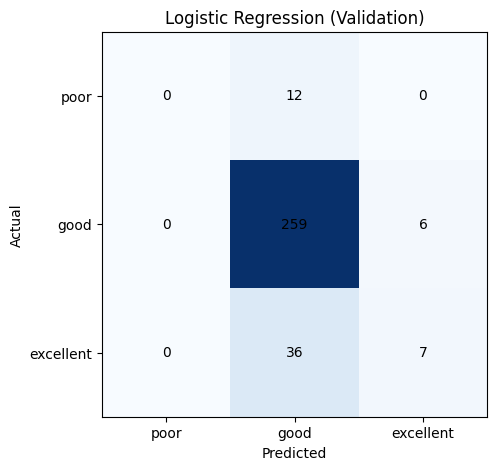

Validation Accuracy: 0.571875 
Test Accuracy: 0.646875


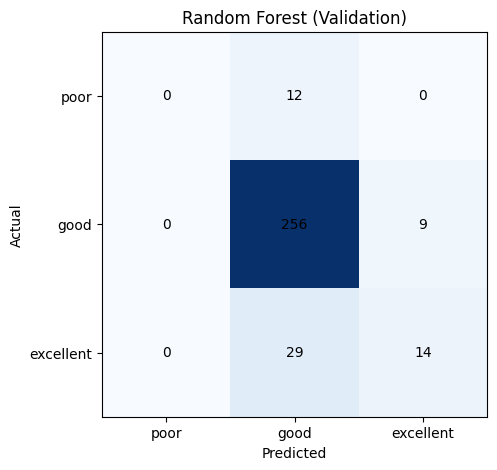

In [ ]:
def plot_confusion_matrix(cm, title, labels):
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    
 
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
    
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    
    
    plt.show()

# labels

labels = ["poor", "good", "excellent"]

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_val_names, y_val_lr_names, labels=labels)
print("Validation Accuracy:", val_acc_lr, "\nTest Accuracy:", test_acc_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression (Validation)", labels)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_val_names, y_val_rf_names, labels=labels)
print("Random Forest Validation Accuracy:", val_acc_rf)
print("Random Forest Test Accuracy:", test_acc_rf)
plot_confusion_matrix(cm_rf, "Random Forest (Validation)", labels)

## Evaluation

To check how well our models predict wine quality we evaluate them using two performance measures:

- **Accuracy**: Measures the percentage of correct predictions. The original quality scores (3–8) are very imbalanced, most wines are rated 5 or 6. This is a known characteristic of the dataset, which is why even a simple model can achieve moderate accuracy.

- **Confusion Matrix**: Shows the detailed breakdown of correct and incorrect predictions for each quality class (poor, good, excellent), helping us see where the model makes mistakes.

We apply these measures to both Logistic Regression and Random Forest models on the validation and test sets. This helps us see which model performs best and which should be used in the demo.

## Saving the Model for Demo

Save the best model (Random Forest) using **joblib**.  
This allows the model to be loaded later in the demo without training again, ensuring fast and consistent predictions.

In [7]:
# Save the trained Random Forest model
joblib.dump(rf, "random_forest_wine_model.pkl")

# Code to load in demo
# rf_loaded = joblib.load("random_forest_wine_model.pkl")

['random_forest_wine_model.pkl']

# Demo GUI 

In [8]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import joblib

# load the model
model = joblib.load("random_forest_wine_model.pkl")

# create a window
window = tk.Tk()
window.title("Wine Quality Predictor")

# feature names list
feature_names = [
    "fixed acidity", "volatile acidity", "citric acid",
    "residual sugar", "chlorides", "free sulfur dioxide",
    "total sulfur dioxide", "density", "pH",
    "sulphates", "alcohol"
]

entries = []

# text fields
for i, name in enumerate(feature_names):
    label = tk.Label(window, text=name)
    label.grid(row=i, column=0, padx=7, pady=7)

    entry = tk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# prediction function
def predict():
    try:
        # input values
        values = [float(e.get()) for e in entries]
        X = np.array(values).reshape(1, -1)

        # make prediction
        pred = model.predict(X)[0]

        # convert to category
        if pred <= 4:
            label = "poor"
        elif pred <= 6:
            label = "good"
        else:
            label = "excellent"

        messagebox.showinfo("Prediction", f"Wine quality: {label}")

    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values.")

# predict button
btn = tk.Button(window, text="Predict", command=predict)
btn.grid(row=len(feature_names), column=0, columnspan=2, pady=10)

# start the GUI event loop
window.mainloop()
